In [ ]:
import numpy as np
from PIL import Image

In [ ]:
using_colab = True
if using_colab:
  import torch
  import torchvision
  print("PyTorch version:", torch. __version__)
  print("Torchvision version: ", torchvision. __version__)
  print("CUDA is available:", torch.cuda.is_available())
  import sys
  !{sys.executable} -m pip install opencv-python matplotlib
  !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
  !mkdir images
  !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
  !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

PyTorch version: 2.2.1+cu121
Torchvision version:  0.17.1+cu121
CUDA is available: False
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-tpogjtn9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-tpogjtn9
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
mkdir: cannot create directory ‘images’: File exists
--2024-03-17 11:51:59--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg.2’

d

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor
sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"
sam = sam_model_registry [model_type](checkpoint = sam_checkpoint)
predictor = SamPredictor(sam)

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_mask (mask, ax, random_color=False):
  if random_color:
    color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
  else:
    color = np.array([30/255, 144/255, 255/255, 0.6])
  h, w = mask.shape[-2:]
  mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
  ax.imshow(mask_image)
def show_points (coords, labels, ax, marker_size=375):
  pos_points = coords[labels==1]
  neg_points = coords[labels==0]
  ax. scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*' ,s=marker_size, edgecolor='white', linewidth=1.25)
  ax. scatter (neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
def show_box (box, ax):
  x0, y0 = box [0], box [1]
  w, h = box [2] - box[0], box[3]- box [1]
  ax.add_patch(plt. Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [ ]:
image = cv2.imread('/content/images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
predictor.set_image (image)

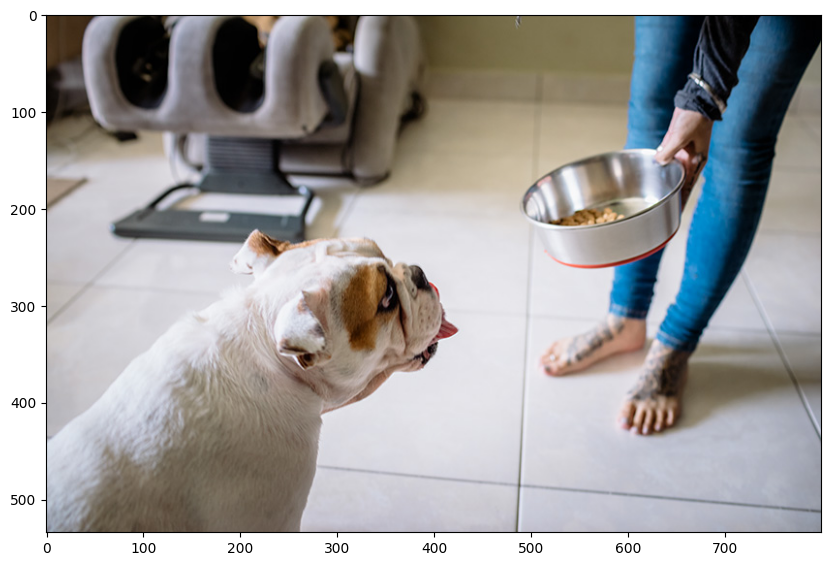

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [ ]:
input_point = np.array([[200, 400]])
input_label = np.array([1])

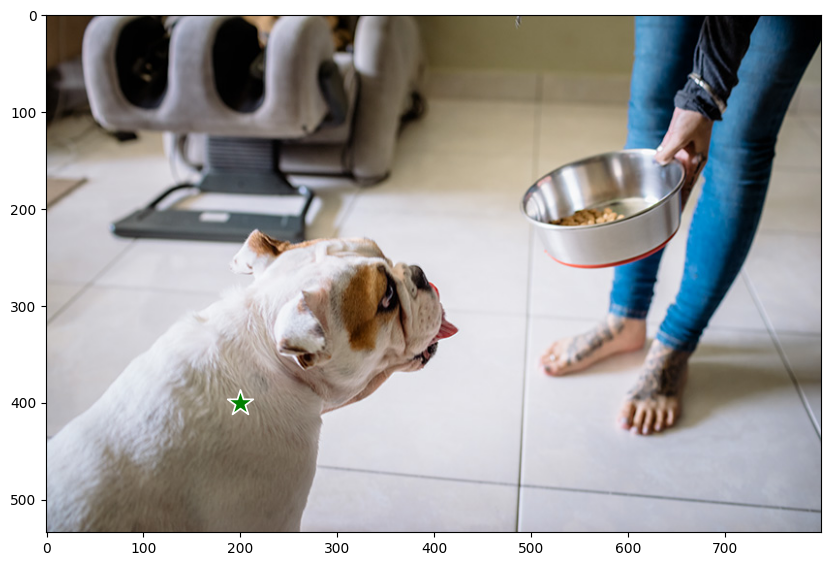

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis( 'on')
plt.show()

In [ ]:
mask, score, logit = predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=False
)

In [ ]:
mask = Image.fromarray(mask[0, :,:])

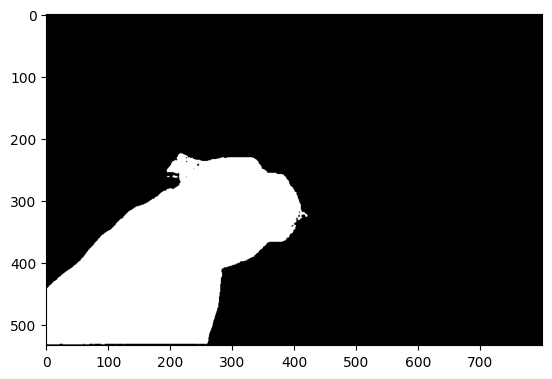

In [ ]:
plt.imshow(mask)

In [ ]:
newsize = (512, 512)
image = image.resize(newsize,refcheck=False)

In [ ]:
mask = mask.resize(newsize)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

In [ ]:
!pip install accelerate

In [ ]:
import torch
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting",revision="fp16",torch_dtype=torch.float16)
pipe.enable_attention_slicing()

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
prompt = "Replace dog with man"
negative_prompt = "something...."
result =  pipe(prompt, image=image, mask_image = mask, negative_prompt = negative_prompt,num_inference_steps = 50, guidance_scale = 11).images
result[0]

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'